I wrote GD in the form of a module, just to be able to add more algorithms and test it easiy.

It includes more algorithm. You can find them in [1609.04747](https://arxiv.org/abs/1609.04747).

This is how it works

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
import GD

# Example

Lets find $w_1$ and $w_2$ for $f(x) = x w_1+ w_2$ that fit with data taken from $t=2*x+3$.

Obviously the answer is $w_1 = 2$ and $w_2 = 3$.

In [3]:
data_in=[]
data_out=[]
xmin=-5
xmax=2
for i in range(500):
    x=np.random.rand()*(xmax-xmin)+xmin
    
    data_in.append( [x])
    data_out.append( [2*x+3])


In [4]:
class modelFunc(GD.modelBase):
    def __init__(self,dimensions,w0):
        GD.modelBase.__init__(self,dimensions,w0)
        
        
    def __call__(self):
        self.signal[0]=self.input[0]*self.w[0]+ self.w[1]
        
        
    def derivative_w(self,i):
        if i==0:
            self.dsdw[0]=self.input[0]
        if i==1:
            self.dsdw[0]=1

In [5]:
#the squared error and its derivative
def Q_i(signal, target):
    return (signal-target)**2


def dQds_i(signal, target):
    return 2*(signal-target)

        
#declare the instances
model=modelFunc([1,1],[1,0.2])
Q=GD.lossFunc(data_in,data_out,Q_i,dQds_i,model)

In [6]:
gd=GD.VanillaGD(Q ,alpha=1e-2)
# gd=GD.RMSpropGD(Q ,gamma=1-1e-2,epsilon=1e-5,alpha=1e-2)
# gd=GD.AdaDeltaGD(Q ,gamma=0.99,epsilon=1e-5,alpha=1)
# gd=GD.AdamGD(Q,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# gd=GD.AdaMaxGD(Q,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# gd=GD.NAdamGD(Q,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)

In [7]:
gd.run(abs_tol=1e-4, rel_tol=1e-4, step_break=250,max_step=5000),len(gd.steps)

([1.999528467962193, 2.998175755231608], 589)

<IPython.core.display.Javascript object>


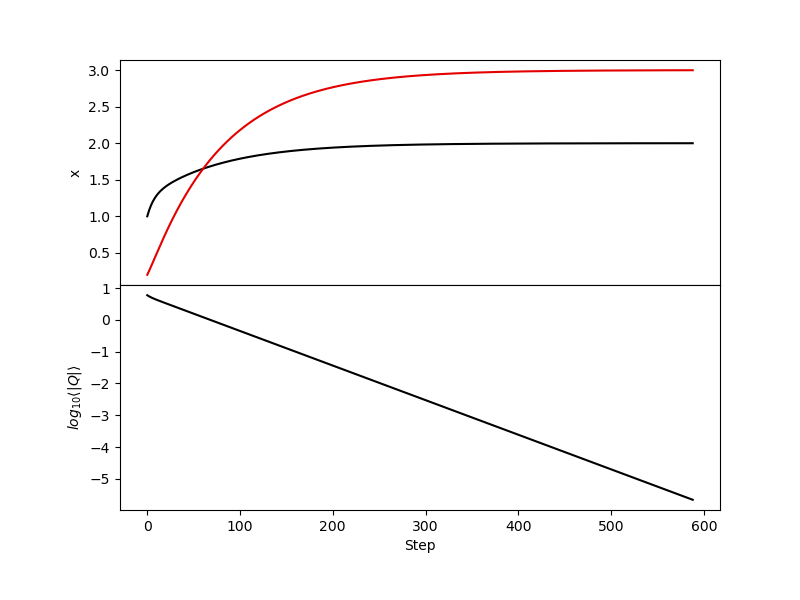

In [8]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(gd.steps)[:,0],c='xkcd:black')
sub.plot(np.array(gd.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
steps=[]
_s=0
_r=len(data_in)
for w in gd.steps:
    model.w=w
    mQ=0
    for i in range(_r): 
        model.setInput(data_in[i])
        model()
        mQ+= Q(data_out[i]) 
    if mQ==0:
        mQ=1e-50
    meanQ.append(np.log10(mQ/_r))
    steps.append(_s)
    _s+=1
    
sub.plot(steps,meanQ,c='xkcd:black')

sub.set_ylabel(r'$log_{10} \langle |Q| \rangle $')

# sub.set_xscale('log')
sub.set_yscale('linear')

sub.set_xlabel('Step')

plt.show()